## Tehtävä 1: toisistaan riippumattomat kubitit ja satunnaisluvun arvonta

Kuvassa on esitetty kolmesta kubitista muodostuva kvanttipiiri.

![kuva1](images/satunnaisluku.png)

Kun jokaiseen yksittäiseen kubittiin q operoidaan Hadamard-portilla eli H-portilla, asettuvat kubitit toisistaan riippumatta tilojen 0 ja 1 superpositioon:

$$ \ket \psi = \frac{1}{\sqrt{2}}\ket 0+\frac{1}{\sqrt{2}}\ket 1 $$

Kun yksittäisen kubitin tila mitataan ja mittaustulos tallennetaan klassiseen rekisteriin (nuoli kuvassa), on molempien mahdollisten mittaustulosten 0 ja 1 todennäköisyys sama:

$$
P(0)=P(1)=(\frac{1}{\sqrt{2}})^2=0.5
$$.

Koska jokaisella kolmella kubitilla on kaksi mahdollista lopputilaa, niin kolmen bitin mittaustulos voi olla 2^3 = 8 erilaista bittien 0 ja 1 yhdistelmää: 000, 001,010, 011 .. ja 111.

Tulostetaan binääriluvut:



In [51]:
for i in range(0b111+1):
    print("binääri:",bin(i),"eli",i)

binääri: 0b0 eli 0
binääri: 0b1 eli 1
binääri: 0b10 eli 2
binääri: 0b11 eli 3
binääri: 0b100 eli 4
binääri: 0b101 eli 5
binääri: 0b110 eli 6
binääri: 0b111 eli 7


 Jokaisen yksittäisen kubitin tilan määräytyessä mittaustapahtumassa jokaisella yksittäisellä mitatulla bitillä on 50% :n esiintymistodennäköisyys olla $0$ tai $1$. Tällöin kaikilla bittien $0$ ja $1$ yhdistelmillä on sama todennäköisyys.

__Tehtävä 1:__ Ohjelmoi (yllä) kuvassa esitetty kvanttipiiri. 

Tarvittavat Pythonin komennot `QuantumCircuit(qubits)`, Hadamard eli H-portti: `circuit.h(qubit)`ja mittaus: `circuit.measure(qubit, register)`

In [1]:
from qiskit import *
#from qiskit.tools.monitor import job_monitor
# Ohjelmoi Tehtävä 1 tähän
#circuit =____

In [ ]:
# Voit ohjelmoida piirin toiminnan tässä, suurin frekvenssi on arvottu luku
simulator = Aer.get_backend('qasm_simulator')
execute(circuit, backend=simulator)
result = execute(circuit, backend=simulator)
job_monitor(result)
print(result.result().get_counts())

## Tehtävä 2

$$\renewcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\renewcommand{\bra}[1]{\left\langle{#1}\right|}$$

Tehtävät 1 - 4 käsittelivät yhden kubitin systeemiä. Seuraavassa kahdessa tehtävässä tarkastelemme controlled NOT -porttia ($\mathit{CNOT}$), joka on kahden kubitin välinen operaatio. Kahden kubitin kvanttipiirissä systeemin tila esitetään seuraavilla kantavektoreilla:

$$
\ket{00},\ \ket{01},\ \ket{10} ja \ \ket{11} 
$$

missä 

$$
\ket{00}=\begin{pmatrix}1 \\ 0 \\ 0 \\0\end{pmatrix},\ \ket{01}=\begin{pmatrix}0 \\ 1 \\ 0 \\0\end{pmatrix},\ 
\ket{10}=\begin{pmatrix}0 \\ 0 \\ 1 \\0\end{pmatrix},\ \ket{11}=\begin{pmatrix}0 \\ 0 \\ 0 \\1\end{pmatrix}
$$


 >**Lisätietoa:** Yllä esitetyt kahden kubitin tilaa esittävien ket-vektorit ja pystyvektorit perustuvat siis seuraavaan tensoritulon $\otimes$ määritelmään:


>$$ \ket a = \begin{pmatrix} a_0 \\ a_1 \end{pmatrix}, \quad \ket b = \begin{pmatrix} b_0 \\ b_1 \end{pmatrix} $$

>$$ 
\ket {ba} = \ket b\otimes \ket a = \begin{pmatrix} b_0 \times \begin{pmatrix} a_0 \\ a_1 \end{pmatrix} \\ b_1 \times \begin{pmatrix} a_0 \\ a_1 \end{pmatrix} \end{pmatrix} = \begin{pmatrix} b_0 a_0 \\ b_0 a_1 \\ b_1 a_0 \\ b_1 a_1 \end{pmatrix}
$$

>Esimerkiksi 
>$$ 
\ket {00} = \ket 0 \otimes \ket 0= \begin{pmatrix} 1 \cdot \begin{pmatrix} 1 \\ 0 \end{pmatrix} \\ 0 \cdot \begin{pmatrix} 1 \\ 0 \end{pmatrix} \end{pmatrix} = \begin{pmatrix} 1\cdot 1 \\ 1\cdot 0 \\ 0 \cdot 1 \\ 0 \cdot 0 \end{pmatrix}=\begin{pmatrix} 1 \\ 0 \\0\\0 \end{pmatrix} 
$$

__Tehtävä 2:__ Muodosta kahden kubitin vektorit laskemalla seuraavat tensoritulot.

$$
\ket {00} = \ket 0 \otimes \ket 0, \ \ket {01} = \ket 0 \otimes \ket 1, \
\ket {10} = \ket 1 \otimes \ket 0 ja \ \ket {11} = \ket 1 \otimes \ket 1 \ 
$$

Pythonissa tensoritulon voi laskea seuraavasti: `np.kron(zero,zero)`


In [ ]:
#Tehtävä 2, ohjelmoi tähän
import numpy as np
zero = np.matrix([[1], [0]])
one = np.matrix([[0], [1]])
#ket00 = np.kron(zero,zero)
print("ket 0\n",zero)
print("ket 1\n",one)
#print("ket00\n",ket00)



ket 0
 [[1]
 [0]]
ket 1
 [[0]
 [1]]


## Tehtävä 3

$\mathit{CNOT}$-portin operoidessa ensimmäinen qubitti on ns. ohjaava kubitti (control qubi1t), ja jälkimmäinen on kohdekubitti (target qubit). $\mathit{CNOT}$ vaikuttaa koko systeemin tilaan seuraavasti:

$$
\ket{00} \rightarrow  \ket{00}   \\
\ket{01} \rightarrow  \ket{01}   \\
\ket{10} \rightarrow  \ket{11}   \\
\ket{11} \rightarrow  \ket{10}   \\
$$

Tulos tarkoittaa, että jos ensimmäinen, ns. ohjaava kubitti on $0$, niin kohdekubitin tila ei muutu. Jos ohjaavakubitti $1$, niin kohdekubitin tila muuttuu. 

$\mathit{CNOT}$-portin matriisiesitys on seuraava:

$$
\mathit{CNOT} = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{pmatrix} 
$$

Huomaa, että vaikka matriisia merkitään monella kirjaimella, se ei ole monen matriisin tulo.

Piirrosmerkki, jossa ylempänä esitetty kubitti on ohjaava, ja alempi toimii kohteena:

![cnot](images/cnot.png)

a) Laske CNOT-matriisin ja 2 kubitin tilaa kuvaavan pystyvektorin tulo, ja osoita että 

$$
\ket{01} \rightarrow  \ket{01} \text{eli laske tulo  } \mathit{CNOT} \ket{01}  \\
\ket{10} \rightarrow  \ket{11}  \text{eli laske tulo  } \mathit{CNOT} \ket{10} \\
$$


<a href="https://youtu.be/rLF-oHaXLtE" target="_blank">ohjevideo CNOT-portin toiminnasta</a>

In [ ]:
# Tehtävä 3: Ohjelmoi pythonilla tähän CNOT-matriisin ja 2 kubitin 
# Tilavektorien tulo. Vertaa yllä olevaan teoriaan ja tulkitse vastaus
import numpy as np

CNOT =  np.matrix([[1,0, 0,0],[0, 1, 0,0], [0, 0, 0,1], [0, 0, 1,0]])
print("CNOT\n",CNOT)

# määritellään pystyvektorina kubitin kvanttitila |00>:
q00 = np.matrix([[1],[0],[0],[0]])
print("ket00\n",q00)

# määritellään pystyvektorina kubitin kvanttitila |01>:
q01 = np.matrix([[0],[1],[0],[0]])
print("ke01\n",q01)
# |10>
q10 = np.matrix([[0],[0],[1],[0]])
#print("ke10\n",q10)

# |11>

q11 = np.matrix([[0],[0],[0],[1]])
#print("ke11\n",q11)
# matriisin ja pystyvektorin tulo numpyssä on * tai @ merkki
# laske tulot tähän


## Tehtävän 4: Bellin tilat ja niiden ket-vektoriesitys

__Johdanto__

Tehtävässä 4 tarkastellaan vielä kertauksena yksinkertaista kvanttipiiriä, jota käytetään Bellin parin luomiseen. Bellin pari kubaa kahden kubitin välistä lomittumista eli kytkentää. Samalla tavoitteena on myös tutustua syvemmin ket-notaation käyttöön kvanttitilan kuvauksessa.

![bell_state](images/bell_state.png)

Kuvan piirissä molemmat kubitit ovat alussa tilassa $\ket 0$. Tämän jälkeen 1. kubittiin operoidaan H-portilla, ja kubitit 1 ja 2 lomitetaan CNOT-portilla. 1. kubitti on tällöin ohjaava kubitti, ja 2. kobitti on kohde. 

Kuvataan ensin kahden kubitin kvanttipiirin tila $H$-portin jälkeen. 1. kubitti on tilojen superpositiossa ja 2. kubitti on edelleen tilassa $\ket 0$:

$$
\frac{1}{\sqrt 2} (\ket 0 +  \ket 1) \otimes \ket 0
$$

Laskemalla tilojen tensoritulon saadaan kahden kubitin systeemin tila esitettyä muodossa


$$
\frac{1}{\sqrt 2} (\ket 0 \ket 0 +  \ket 1 \ket 0) = \frac{1}{\sqrt 2}(\ket{00}+\ket{10}).
$$

Seuraavaksi esitetään, miten CNOT-portti vaikuttaa kahden kubitin systeemissä. Jos ohjaavan ensimmäisen kubitin tila on 1, niin kohdekubitin eli jälkimmäisen kubitin tila kääntyy:

$$
\frac{1}{\sqrt 2}(\ket{00}+\ket{10}) \xrightarrow{\text{CNOT}}\frac{1}{\sqrt 2}(\ket{00}+\ket{11})
$$

Tätä lopputilaa kutsutaan Bellin $\ket {\phi^+}$ tilaksi. Eli Bellin $\ket {\phi^+}$ tila määritellään seuraavasti:

$$\ket {\phi^+}=\frac{1}{\sqrt 2}(\ket{00}+\ket{11}$$

### ket-vektoriesitys:
__Tehtävä 4A)__ Ohjelmoi piirin toiminta kubittien alkuarvoilla $\ket 1$ ja $\ket 0$.  Alla on esitetty piirin toiminta ket-notaation avulla. 

![bell_state](images/another_bell_state.png)

Ohje: Muista 2. kierroksen tehtävien tulos, kuinka Hadamard-porttilla operointi vaikuttaa tilaan $\ket 1$, eli $H\ket 1 = \frac{1}{\sqrt 2} (\ket 0 - \ket 1)$.

a-kohta:

$H\ket 1 \otimes \ket 0 = \frac{1}{\sqrt 2} (\ket 0 - \ket 1) \otimes \ket 0$.


$$
\frac{1}{\sqrt 2}(\ket{00}-\ket{10}) \xrightarrow{\text{CNOT}}\frac{1}{\sqrt 2}(\ket{00}-\ket{11})
$$







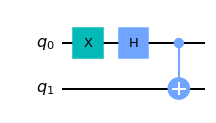

In [2]:
# Ohjelmoit tehtävän 4A kuvassa esitetty kvanttipiiri tähän

circuit=QuantumCircuit(2)
# jatka tästä
#circuit.__

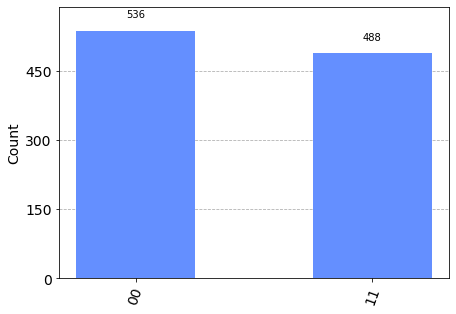

In [3]:
# mitataan
circuit.measure_all()
# Simuloidaan piirin toiminta.
simulator = Aer.get_backend('qasm_simulator')
execute(circuit, backend=simulator)
result = execute(circuit, backend=simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [ ]:
# Laske 4A matriisiesityksen avulla

# määritellään pystyvektorina kubitin kvanttitila 0:
zero = np.matrix([[1],[0]])

# määritellään pystyvektorina kubitin kvanttitila 1:
one = np.matrix([[0],[1]])

# Matriisit X, H ja CNOT
X =  np.matrix([[0, 1],[1, 0]])

H =  1/np.sqrt(2)*np.matrix([[1, 1],[1, -1]])

CNOT =  np.matrix([[1,0, 0,0],[0, 1, 0,0], [0, 0, 0,1], [0, 0, 1,0]])

#print("X*ket 0 = ket 1\n", X*zero)
print("H*ket 1\n",H*one)
print("tensoritulo H ket 1 ja ket 0\n",np.kron((H*one),zero))
print("CNOT\n",CNOT*(np.kron((H*one),zero)))

kertaus, vertaa kantavektoreiden pystyvektoriesitykseen:

$$
\ket{00}=\begin{pmatrix}1 \\ 0 \\ 0 \\0\end{pmatrix},\ \ket{01}=\begin{pmatrix}0 \\ 1 \\ 0 \\0\end{pmatrix},\ 
\ket{10}=\begin{pmatrix}0 \\ 0 \\ 1 \\0\end{pmatrix},\ \ket{11}=\begin{pmatrix}0 \\ 0 \\ 0 \\1\end{pmatrix}
$$

CNOT-operaatio:

$$
\frac{1}{\sqrt 2}(\ket{00}-\ket{10}) \xrightarrow{\text{CNOT}}\frac{1}{\sqrt 2}(\ket{00}-\ket{11})
$$

B) Laske piirin toiminta myös kubittien alkuarvoilla $\ket 0$ ja $\ket 1$. Eli simuloi alla kuvattu piirin toiminta:

$H\ket 0 \otimes \ket 1 = \frac{1}{\sqrt 2} (\ket 0 + \ket 1) \otimes \ket 1$.


$$
\frac{1}{\sqrt 2}(\ket{01}+\ket{11}) \xrightarrow{\text{CNOT}}\frac{1}{\sqrt 2}(\ket{01}+\ket{10})
$$



In [ ]:
# TEhtävä 4B Ohjelmoi ja simuloi 4B kvanttippiri

In [ ]:
#Tehtävä 4B: laske piirin 4B toiminta matriisiesityksessä

C)vapaaehtoinen lisätehtävä: Ohjelmoi piirin toiminta myös kubittien alkuarvoilla $\ket 1$ ja $\ket 1$.

$H\ket 1 \otimes \ket 1 = \frac{1}{\sqrt 2} (\ket 0 - \ket 1) \otimes \ket 1$.


$$
\frac{1}{\sqrt 2}(\ket{01}-\ket{11}) \xrightarrow{\text{CNOT}}\frac{1}{\sqrt 2}(\ket{01}-\ket{10})
$$

In [ ]:
#Vapaaehtoinen Tehtävä 4C: simuloi ket-esityksen kvanttipiiri

**LISÄTIETOJA: TEHTÄVÄN 4 RATKAISUT:**


Tehtävän A- ja B-kohdan ratkaisut ovat ns. Bellin tiloja, jotka määritellään seuraavasti:

**A:** Kun alkuarvot ovat $\ket 1$ ja $\ket 0$, niin saadaan $\ket {\phi^-}=\frac{1}{\sqrt 2}(\ket{00}-\ket{11}$

**B:**

Kun alkuarvot ovat $\ket 0$ ja $\ket 1$, niin saadaan $\ket {\psi^+}=\frac{1}{\sqrt 2}(\ket{01}+\ket{10}$ 

Kun alkuarvot ovat $\ket 1$ ja $\ket 1$, niin saadaan $\ket {\psi^-}=\frac{1}{\sqrt 2}(\ket{01}-\ket{10}$


Vektorit $\ket {\phi^+}$ ja $\ket {\phi^-}$ sekä $\ket {\psi^+}$ ja $\ket {\psi^-}$ ovat ns. ortonormaaleja Bellin kantavektoreita, joita voidaan käyttää kvanttipiirin tilan kuvauksessa. Kun Bellin kantavektorit laskettiin kahden kubitin alkutiloista suoritetiin ns. kannanvaihto. H- ja CNOT-porttien avulla toteutettu kannanvaihto on unitaarinen, koska käytetyt portit ovat unitaarisia. Oikeastaan kaikki ortonormaalien kantojen väliset kannanvaihto-operaattorit ovat unitaarisia.


__LISÄTEHTÄVÄ__ (vapaaehtoinen)
Seuraavalla kaavalla voidaan laskea todennäköisyys, että kubitti $\ket \psi$ havaitaan tilassa $\ket x$.
$$
P(\ket x)= |\braket {x | \psi}|^2 . 
$$


a) Olkoon kubitti alkutilassa $\ket {\phi^-}$. Määritä todennäköisyys, että kubitin tilan mittauksessa saadaan mittaustulokseksi eli kubitin tilaksi $\ket{00}$.

In [ ]:
# LISÄTEHTÄVÄ tähän
# määritellään pystyvektorina kubitin kvanttitila 0:
zero = np.matrix([[1],[0]])

# määritellään pystyvektorina kubitin kvanttitila 1:
one = np.matrix([[0],[1]])

# Matriisit X, H ja CNOT
X =  np.matrix([[0, 1],[1, 0]])

H =  1/np.sqrt(2)*np.matrix([[1, 1],[1, -1]])

CNOT =  np.matrix([[1,0, 0,0],[0, 1, 0,0], [0, 0, 0,1], [0, 0, 1,0]])

## Tehtävä 5
Y-portti vastaa kubitin tilavektorin kiertoa Blochin pallolla $180^o$ y-akselin ympäri . Y-portin matriisiesitys on seuraava:

$$
Y=\begin{pmatrix} 0 & -i \\ i & 0\end{pmatrix}
$$

Merkintä $i$ on kompleksilukuihin liittyvä imaginaariyksikkö, jolle on voimassa $i^2 = -1$. 
<a href="http://math.tkk.fi/opetus/p3/04/L/L1printit.pdf" target="_blank">Lisätietoa kompleksiluvuista.</a>

Vastaavasti Z-portti vastaa kubitin tilavektorin kiertoa Blochin  $180^o$ kiertoa z-akselin ympäri. Z-portin matriisiesitys on seuraava:

$$
Z=\begin{pmatrix}1 & 0 \\ 0 & -1\end{pmatrix}
$$

__Tehtävä 5A)__ Tutki <a href="https://bloch.ollpu.fi/" target="_blank">havainnollistavan simulaation</a> avulla miten alkutilassa $\ket 0$ oleva tilavektori  kierttyy X, Y, Z porttien vaikutuksesta Blochin pallolla x,y,z-akselien ympäri.

__Tehtävä 5B)__ Ratkaise-kohdan simulaation avulla: Jos kubitin alkutila on $\ket 0$, niin mikä on kubitin lopputila seuraavien porttien operaatioiden eli kiertojen jälkeen? Kiinnitä huomiota minkä akselin ympäri portti kiertää kubittia, ja vaikuttaako kyseinen kierto kubitin tilaan?
![kubit_xyz.png](images/kubit_xyz.png)

__Tehtävä 5C)__  Tutki <a href="https://bloch.ollpu.fi/" target="_blank">havainnollistavan simulaation</a> avulla : Jos yhden kubitin kvanttipiriissä kubitin alkutila on $\ket 0$, niin mikä on kubitin lopputila seuraavien operaatioiden eli kiertojen jälkeen $HZH$?

Millä yhdellä portilla operaatio $HZH$ voidaan korvata?

__Tehtävä 5D)__ Pythonissa matriisin Y käänteismatriisin voi laskea komennolla `np.linalg.inv(Y)`. Tulosta matriisi Y ja sen käänteismatriisi.
 
Osoita laskemalla pythonilla matriisien tulo, että $YY=I$, missä $I$ on yksikkömatriisi. Tämä tarkoittaa jälleen, että $Y$ on itsensä käänteismatriisi. Kaksi Y-portin operaatiota kiertää kubitin tilavektorin takaisin alkuperäiseen tilaan.

In [ ]:
# Tehtävä 5D
Y = np.matrix([[0,-1j],[1j,0]])
print("Y Matriisi:\n",Y)
#print("Y Matriisin käänteismatriisi:\n")
#print("tulo YY:")


## Tehtävä 6

Muodosta kuvan kvanttipiirin toimintaa kuvaava unitaarinen matriisi.

![tehtava6.png](images/tehtava6.png)

In [ ]:
# Laske tehtävä 6 tähän matriisiesityksen avulla

# määritellään pystyvektorina kubitin kvanttitila 0:
zero = np.matrix([[1],[0]])

# määritellään pystyvektorina kubitin kvanttitila 1:
one = np.matrix([[0],[1]])

# Matriisit X, H ja CNOT
X =  np.matrix([[0, 1],[1, 0]])

H =  1/np.sqrt(2)*np.matrix([[1, 1],[1, -1]])

CNOT =  np.matrix([[1,0, 0,0],[0, 1, 0,0], [0, 0, 0,1], [0, 0, 1,0]])

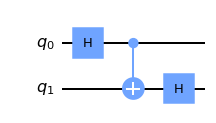

In [3]:
circuit =QuantumCircuit(2)
circuit.h(0)
circuit.cx(0,1)
circuit.h(1)
circuit.draw(output='mpl')

## Tehtävä 7 kvanttinoppa lukujen 1 -6 arvontaan

Lue artikkeli kvanttinoppa ja erityisesti miten nopan silmäluvut 1- 6 voidaan ohjelmoida kolmen kubitin kvanttipiiriin kvanttialgoritmilla.

<a href="https://www.lukemaverkosto.fi/materiaali/microbit-kvanttinoppa/" target ="_blank"> Microbit kvanttinoppa</a>

Artikkelin alussa oleva helppo esimerkki on lämmittelyä. Perehdy R-kiertoportilla toteutettuun versioon.

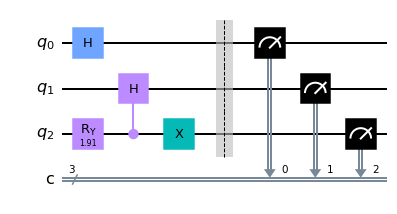

In [78]:
import math
dice_circuit =QuantumCircuit(3,3)
# Käännetään kubittia kohdassa 2 sopivan määrän, jotta 
# saadaan 1 todennäköisyydellä 2/3
# Matematiikka luvun taustalla löytyy artikkelista
dice_circuit.ry(2 * math.asin(math.sqrt(2/3)), 2)

dice_circuit.ch(2, 1)
dice_circuit.x(2)
dice_circuit.h(0)

dice_circuit.barrier()
dice_circuit.measure([0,1,2],[0,1,2])
dice_circuit.draw(output="mpl")

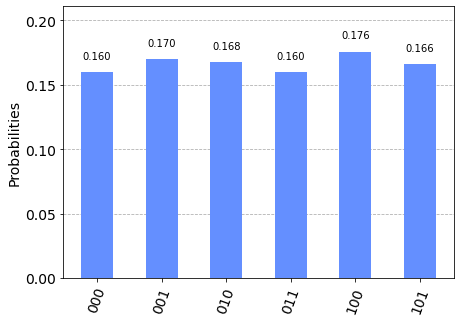

In [79]:
# käytetään simulaattoria, eli ei ajeta ohjelmaa oikealla kvanttitietokoneella
computer = Aer.get_backend("qasm_simulator")
r = execute(dice_circuit, computer).result()
plot_histogram(r.get_counts())